## Projet 10 : Application de recommandation de contenu

Dans ce notebook, nous allons effectuer l'analyse exploratoire des données (EDA) pour déterminer l'organisation des données brutes et leur composition. Cette analyse nous permettra de mieux comprendre les structures de données, d'identifier les tendances et les patterns, et de préparer les données pour la phase de développement de notre MVP.

### 1. Import

#### 1.1 Import des packages

Voici les libraries que nous allons utiliser

- ``os`` : Module Python pour interagir avec le système d'exploitation.

- ``pandas`` : Bibliothèque pour la manipulation de données.

- ``numpy`` : Supporte les tableaux et matrices multidimensionnels.

- ``matplotlib.pyplot`` : Bibliothèque de graphiques 2D.

- ``seaborn`` : Visualisation de données basée sur matplotlib.

- ``pickle`` : Module pour sérialiser et désérialiser les structures d'objets Python.

In [14]:
import os 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import pickle 


#### 1.2 Import des données

<p align="center">
  <img src="../resources/img/globo_logo.png" />
</p>

Les données que nous allons utiliser proviennent d'un vaste ensemble de données de recommandations de news, comprenant les logs d'interactions des utilisateurs du site globo.com, l'un des sites de nouvelles les plus populaires au Brésil. Ces données offrent un aperçu précieux des comportements des utilisateurs et des tendances de consommation de nouvelles.

Lien source des données : https://www.kaggle.com/datasets/gspmoreira/news-portal-user-interactions-by-globocom/data"

In [15]:
data_path = Path("../data/raw/globocom/")
clicks_path= Path("../data/raw/globocom/clicks/")

### 2. Première Analyse 

Maintenant, nous allons explorer les données pour avoir une première visualisation de leur contenu. Cela nous permettra de comprendre mieux la structure des données, les types de valeurs qu'elles contiennent et les relations potentielles entre différentes variables. Cette étape est essentielle pour déterminer comment nous pouvons utiliser au mieux ces données pour répondre à nos questions de recherche.

#### 2.1 Structure des données

In [16]:
# liste des tous les fichiers dans le dossier en excluant le fichier .DS_Store
files = [f.name for f in data_path.iterdir() if f.name != '.DS_Store']

# affichage des fichiers dans le dossier
for file in files:
    print(f"📂 {file}")

📂 articles_embeddings.pickle
📂 articles_metadata.csv
📂 clicks
📂 clicks_sample.csv


### 2.2 Affichage des données et analyse du contenu

##### 2.2.1 Analyse contenu ``click_samples.csv``

In [17]:
df_sample=pd.read_csv(str(data_path) + "/clicks_sample.csv")
print(f"Nombre de lignes: {df_sample.shape[0]}, Nombre de colonnes: {df_sample.shape[1]}")
df_sample.head()

Nombre de lignes: 1883, Nombre de colonnes: 12


,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


Cette DataFrame répresente une sample des données qui sont contenues dans le dossier ``clicks``.
Chaque ligne répresente les interactions des utilisateurs avec le site.

- `user_id` : L'ID de l'utilisateur qui a effectué le clic.

- `session_id` : L'ID de la session pendant laquelle le clic a été effectué.

- `session_start` : Le moment du début de la session.

- `session_size` : La taille de la session.

- `click_article_id` : L'ID de l'article qui a été cliqué.

- `click_timestamp` : Le timestamp du clic.

- `click_environment` : L'environnement dans lequel le clic a été effectué.

- `click_deviceGroup` : Le groupe de dispositifs à partir duquel le clic a été effectué.

- `click_os` : Le système d'exploitation à partir duquel le clic a été effectué.

- `click_country` : Le pays à partir duquel le clic a été effectué.

- `click_region` : La région à partir de laquelle le clic a été effectué.

- `click_referrer_type` : Le type de référent pour le clic.


In [18]:
file_count = len(list(Path(clicks_path).glob('*')))
print("Numero des fichiers dans le dossier clicks:", file_count)

Numero des fichiers dans le dossier clicks: 385


In [19]:
# liste des fichiers csv dans le dossier clicks
csv_files = list(clicks_path.glob('*.csv'))

# affichage de l'element 51 
print(csv_files[50].name)

clicks_hour_050.csv


Dans le dossier nommé "clicks", nous disposons de 385 fichiers. Chaque fichier représente une heure de données relatives aux clics effectués par les utilisateurs. 

##### 2.2.2 Analyse contenu ``articles_metadata.csv``

In [20]:
df_sample=pd.read_csv(str(data_path) + "/articles_metadata.csv")
print(f"Nombre de lignes: {df_sample.shape[0]}, Nombre de colonnes: {df_sample.shape[1]}")
df_sample.head()

Nombre de lignes: 364047, Nombre de colonnes: 5


,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


Cette Dataframe contient les metadata des $364047$ articles publiées dans les site.
- ``article_id`` : L'ID de l'article.

- ``category_id`` : L'ID de la catégorie à laquelle appartient l'article.

- ``created_at_ts`` : Le timestamp de la création de l'article.

- ``publisher_id`` : L'ID de l'éditeur de l'article.

- ``words_count`` : Le nombre de mots dans l'article.

##### 2.2.3 Analyse contenu ``Articles_embeddings.pickle``

In [21]:
# Ouvrir le fichiers pickle et afficher les 5 premiers lignes
with open(data_path / 'articles_embeddings.pickle', 'rb') as f:
    data = pickle.load(f)

df_sample = pd.DataFrame(data)
print(f"Nombre de lignes: {df_sample.shape[0]}, Nombre de colonnes: {df_sample.shape[1]}")
df_sample.head()

Nombre de lignes: 364047, Nombre de colonnes: 250


,0,1,2,3,4,5,6,7,8,9,...,240,241,242,243,244,245,246,247,248,249
0,-0.161183,-0.957233,-0.137944,0.050855,0.830055,0.901365,-0.335148,-0.559561,-0.500603,0.165183,...,0.321248,0.313999,0.636412,0.169179,0.540524,-0.813182,0.286870,-0.231686,0.597416,0.409623
1,-0.523216,-0.974058,0.738608,0.155234,0.626294,0.485297,-0.715657,-0.897996,-0.359747,0.398246,...,-0.487843,0.823124,0.412688,-0.338654,0.320787,0.588643,-0.594137,0.182828,0.397090,-0.834364
2,-0.619619,-0.972960,-0.207360,-0.128861,0.044748,-0.387535,-0.730477,-0.066126,-0.754899,-0.242004,...,0.454756,0.473184,0.377866,-0.863887,-0.383365,0.137721,-0.810877,-0.447580,0.805932,-0.285284
3,-0.740843,-0.975749,0.391698,0.641738,-0.268645,0.191745,-0.825593,-0.710591,-0.040099,-0.110514,...,0.271535,0.036040,0.480029,-0.763173,0.022627,0.565165,-0.910286,-0.537838,0.243541,-0.885329
4,-0.279052,-0.972315,0.685374,0.113056,0.238315,0.271913,-0.568816,0.341194,-0.600554,-0.125644,...,0.238286,0.809268,0.427521,-0.615932,-0.503697,0.614450,-0.917760,-0.424061,0.185484,-0.580292


Cette dataframe contient une matrice NumPy qui renferme les embeddings des articles. Ces embeddings sont des vecteurs de 250 dimensions qui ont été entraînés sur le texte et les métadonnées en utilisant le module CHAMELEON ACR. Pour plus de détails sur ce module, vous pouvez consulter le lien suivant : https://arxiv.org/abs/1808.00076. Les embeddings sont des représentations vectorielles qui capturent les caractéristiques sémantiques des articles. 

Nous pouvons utiliser une technique de réduction de dimensionnalité, notamment le t-SNE comme indiqué sur le site source des données : https://www.kaggle.com/datasets/gspmoreira/news-portal-user-interactions-by-globocom#clicks_sample.csv, pour visualiser les embeddings colorée par catégories.

On as bien $364047$ lignes qui est aussi le nombre des articles total que on as trouvé dans les fichier ``articles_metadata.csv``

### 3. Analyse en profondeur des données

#### 3.1 Analyse des clicks

On procéde maintenant avec la concatenation des tous les fichiers contenues dans le dossier ``clicks`` pour l'analyser dans son ensemble.

In [22]:
def get_all_files_clicks(path : Path):
    all_df = pd.concat(
        [pd.read_csv(file) for file in path.glob('*.csv')],
        ignore_index=True
    )
    return all_df

In [23]:
df_clicks = get_all_files_clicks(clicks_path)
print(f"Nombre de lignes: {df_clicks.shape[0]}, Nombre de colonnes: {df_clicks.shape[1]}")

Nombre de lignes: 2988181, Nombre de colonnes: 12


In [24]:
df_clicks.describe()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
count,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181,2988181
unique,322897,1048594,646874,72,46033,2983198,3,5,8,11,28,7
top,5890,1507563657895091,1507563657000,2,160974,1506961009961,4,1,17,1,25,2
freq,1232,124,127,1260372,37213,3,2904478,1823162,1738138,2852406,804985,1602601


In [25]:
num_unique_users = df_clicks['user_id'].nunique()
print("Nombre des utilisateurs unique:", num_unique_users)

Nombre des utilisateurs unique: 322897


Dans l'ensemble des fichiers des clicks on trouve $322897$ uniques utilisateurs sur le $2988181$ lignes totales.
On vas effectuer une contrôle pour vérifier si il y à des lignes dupliquées en se basant sur toutes les colonnes.

In [26]:
duplicates = df_clicks.duplicated(keep=False)
num_duplicates = duplicates.sum()

print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 0


In [27]:
df_clicks['click_timestamp'] = pd.to_datetime(df_clicks['click_timestamp'], unit='ms')

In [28]:
first_date = df_clicks['click_timestamp'].min()
last_date = df_clicks['click_timestamp'].max()

print("First Date:", first_date)
print("Last Date:", last_date)

First Date: 2017-10-01 03:00:00.026000
Last Date: 2017-11-13 20:04:14.886000


In [29]:
difference_in_days = (last_date - first_date).days
print("Difference in days: ", difference_in_days)

Difference in days:  43


En total on as donc les données des clicks pour 43 jours a partir du 10 octobre jusqu'au 11 novembre 2017

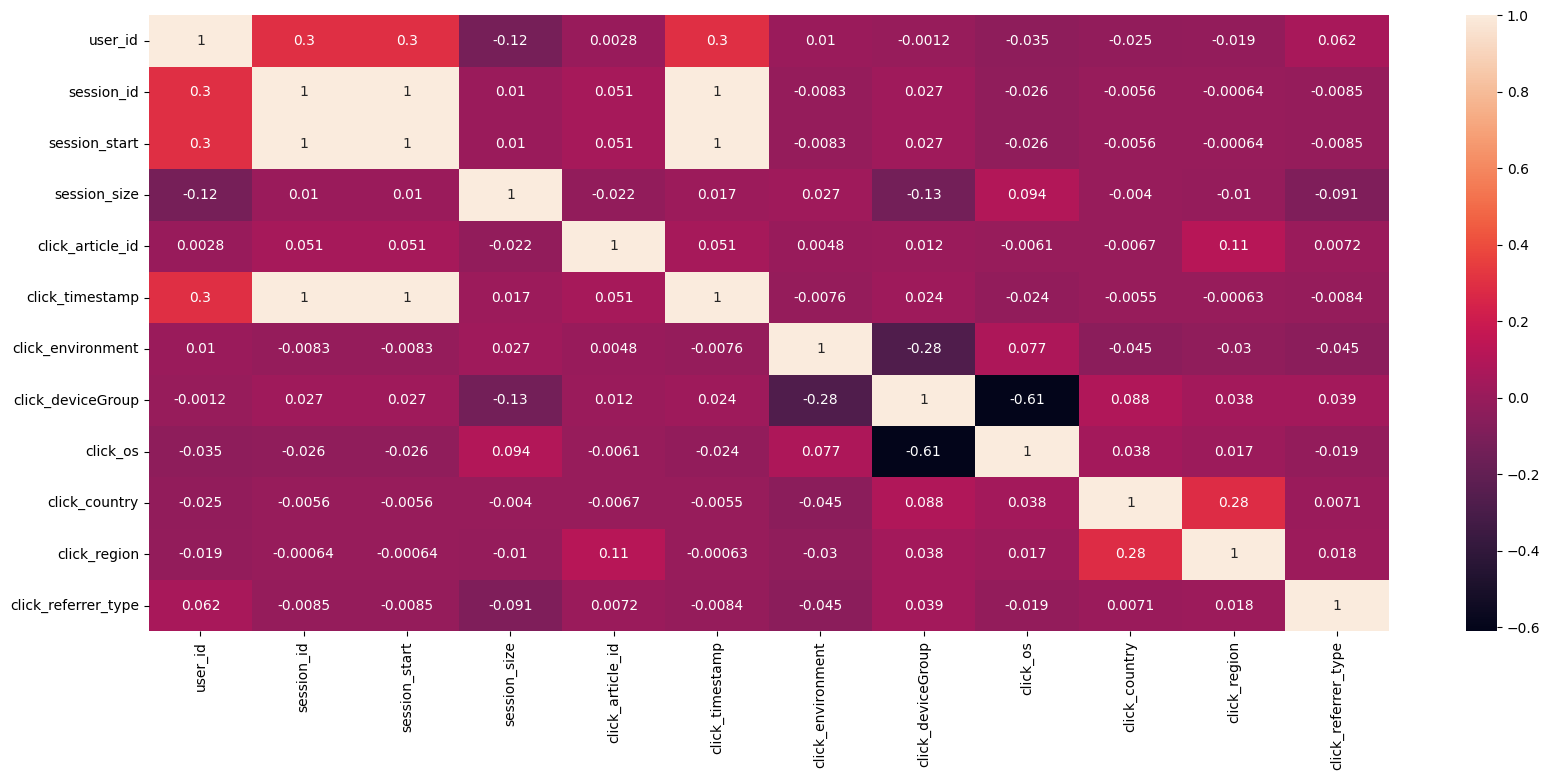

In [30]:
correlation_map = df_clicks[df_clicks.columns.tolist()].astype("int64").corr()
plt.figure(figsize=(20,8))
sns.heatmap(correlation_map,annot=True)
plt.show()

La matrice de corrélation présentée ci-dessus montre les corrélations entre différentes variables de notre jeu de données. Les corrélations sont mesurées par le coefficient de corrélation de **Pearson**, qui varie entre -1 et 1. Voici quelques observation :

1. **user_id** :
   - Corrélation modérée avec `session_id` et `session_start` (0.3). Cela peut indiquer que chaque utilisateur a des sessions spécifiques et des points de départ de session récurrents.

2. **session_id** et **session_start** :
   - Fortement corrélés (1). Cela suggère que chaque session a un point de départ unique et que ces variables peuvent être presque interchangeables dans le contexte de notre analyse.

3. **session_size** :
   - Faible corrélation négative avec `user_id` (-0.12). Cela pourrait indiquer que la taille des sessions varie indépendamment de l'utilisateur.

4. **click_article_id** :
   - Corrélation très faible avec la plupart des autres variables. Cela signifie que l'identifiant des articles cliqués n'est pas fortement influencé par les autres facteurs présents dans cette matrice.

5. **click_timestamp** :
   - Corrélation parfaite avec `session_id` et `session_start` (1). Ce résultat est attendu car le timestamp du clic devrait être directement lié à la session et à son début.

6. **click_environment** et **click_deviceGroup** :
   - Corrélation négative modérée (-0.28). Cela pourrait indiquer que les environnements de clic et les groupes de dispositifs sont souvent différents.

7. **click_os** et **click_deviceGroup** :
   - Corrélation négative forte (-0.61). Ce qui suggère une relation inverse significative entre le système d'exploitation et le groupe de dispositifs utilisé pour cliquer.

8. **click_country** et **click_region** :
   - Corrélation modérée (0.28). Cela est logique car les régions sont contenues dans les pays et il y a donc une certaine dépendance.

9. **click_referrer_type** :
   - Faibles corrélations avec les autres variables, ce qui montre que la source du référent des clics est relativement indépendante des autres facteurs.

#### 3.2 Analyse ``article_metadata``

In [31]:
# creation dataframe avec les données de articles_metadata.csv
df_art_meta=pd.read_csv(str(data_path) + "/articles_metadata.csv")

In [32]:
# affichage de 2 lignes
df_art_meta.head(2)

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189


In [33]:
# Contrôle des valuers dupliquées
duplicates = df_art_meta.duplicated(keep=False)
num_duplicates = duplicates.sum()

print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 0


In [34]:
# contrôle des nombre des publisher uniques
num_unique_publishers = df_art_meta['publisher_id'].nunique()
print("Number of unique publisher_id:", num_unique_publishers)

Number of unique publisher_id: 1


In [35]:
# contrôle de nombre des categories uniques
num_unique_category = df_art_meta['category_id'].nunique()
print("Number of unique category_id:", num_unique_category)

Number of unique category_id: 461


In [36]:
df_art_meta['created_at'] = pd.to_datetime(df_art_meta['created_at_ts'], unit='ms')

In [37]:
first_date = df_art_meta['created_at'].min()
last_date = df_art_meta['created_at'].max()

print("Première date: ", first_date)
print("Dernière date:" , last_date)

Première date:  2006-09-27 11:14:35
Dernière date: 2018-03-13 12:12:30


In [38]:
df_art_meta_sorted = df_art_meta.sort_values('created_at')


C:\Users\Zacca\AppData\Local\Temp\ipykernel_7140\2084812070.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  articles_by_year = df_art_meta_sorted.resample('M', on='created_at').size()


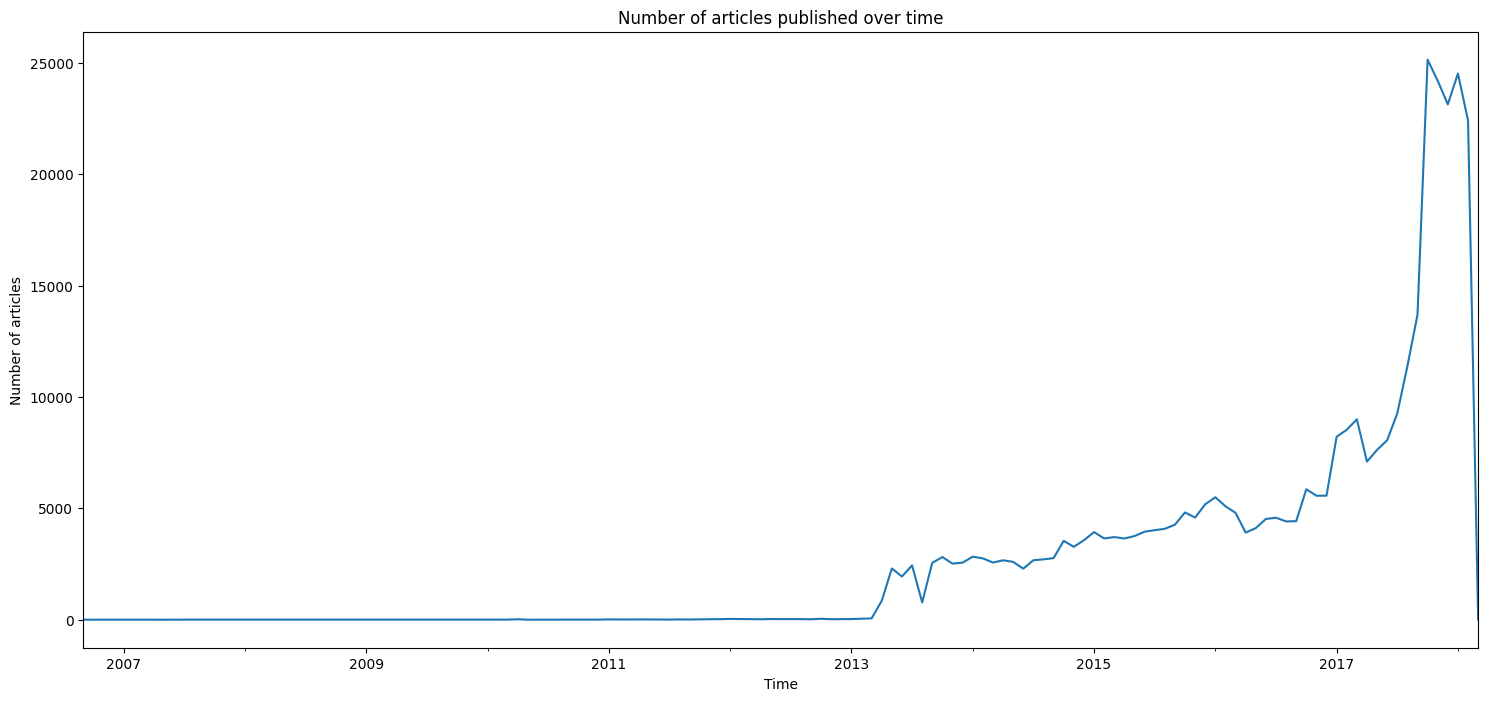

In [39]:
# Resample to get the count of articles published each year
articles_by_year = df_art_meta_sorted.resample('M', on='created_at').size()

# Plot the result
plt.figure(figsize=(18,8))
articles_by_year.plot(kind='line')
plt.title("Number of articles published over time")
plt.xlabel("Time")
plt.ylabel("Number of articles")
plt.show()

Les publisher est unique, dont la colonne ``publisher_id`` est pas interessant.
Puis on observe que la colonne ``category_id`` presente 461 valeurs uniques.

On couvre 11 années des publications d'articles de $2006$ en arrivant à $2018$

Les 2017 est l'année dont on as la majoritées des articles publiées, et est aussi l'année dont on as les données des clicks des clients

Maintenant, nous allons créer un boxplot pour mieux observer la distribution du nombre de mots. Un boxplot, ou boîte à moustaches, est une représentation graphique des données statistiques basée sur un résumé de cinq nombres : le minimum, le premier quartile (25e percentile), la médiane (50e percentile), le troisième quartile (75e percentile), et le maximum.

Les boxplots peuvent nous informer sur nos valeurs aberrantes et leurs valeurs. Ils peuvent également nous dire si nos données sont symétriques, comment nos données sont regroupées, et si et comment nos données sont biaisées.

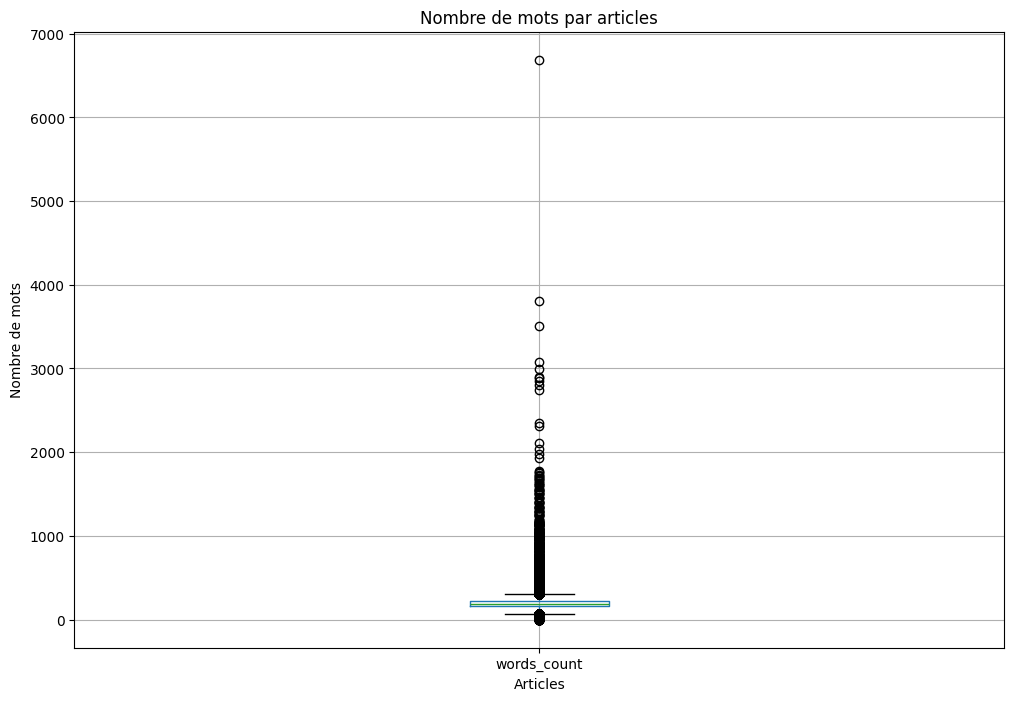

In [40]:
plt.figure(figsize=(12,8))
plt.title("Nombre de mots par articles")
df_art_meta.boxplot(column='words_count')
plt.xlabel("Articles")
plt.ylabel("Nombre de mots")
plt.show()

Dans ce boxplot on peut observer que la majoritées des articles ont entre 0 et 1000 mots. 
On peut aussi observer la presence des beaucoup de outliers allants jusqu'a presque 7000 mots pour une article.

In [41]:
# Calculate descriptive statistics for word counts
mean = df_art_meta['words_count'].mean()
median = df_art_meta['words_count'].median()
std_dev = df_art_meta['words_count'].std()

print(f"Moyenne du nombre de mots par article: {mean}")
print(f"Médiane du nombre de mots par article: {median}")
print(f"Écart type du nombre de mots par article: {std_dev}")

# Group data by publication date and calculate mean word count
grouped_by_date = df_art_meta.groupby(df_art_meta['created_at'].dt.year)['words_count'].mean()

print("\nMoyenne du nombre de mots par article, regroupés par date de publication:")
print(grouped_by_date)

Moyenne du nombre de mots par article: 190.89772749123054
Médiane du nombre de mots par article: 186.0
Écart type du nombre de mots par article: 59.50276597016959

Moyenne du nombre de mots par article, regroupés par date de publication:
created_at
2006    245.555556
2007    302.030303
2008    380.428571
2009    189.923077
2010    206.540984
2011    231.588235
2012    193.958944
2013    193.138291
2014    191.102620
2015    187.885977
2016    191.022669
2017    191.638467
2018    190.115695
Name: words_count, dtype: float64


La moyenne du nombre de mots par article est d'environ 191, avec une médiane de 186. Cela suggère que la distribution du nombre de mots est légèrement asymétrique à droite, car la moyenne est légèrement supérieure à la médiane. L'écart type est d'environ 60, ce qui indique que le nombre de mots varie assez largement autour de la moyenne.

Lorsque nous examinons le nombre moyen de mots par année, nous constatons qu'il a généralement diminué avec le temps. En 2006, le nombre moyen de mots était d'environ 246, et il a augmenté à 302 en 2007 et 380 en 2008. Cependant, à partir de 2009, le nombre moyen de mots a été d'environ 190-200, avec quelques fluctuations. Cela pourrait suggérer une tendance vers des articles plus courts au fil du temps.

 Pour affiner notre analyse, maintenant nous allons créer et afficher un histogramme qui montre la distribution du nombre de mots dans les articles, en considérant uniquement les articles avec un nombre de mots entre 0 et 700.

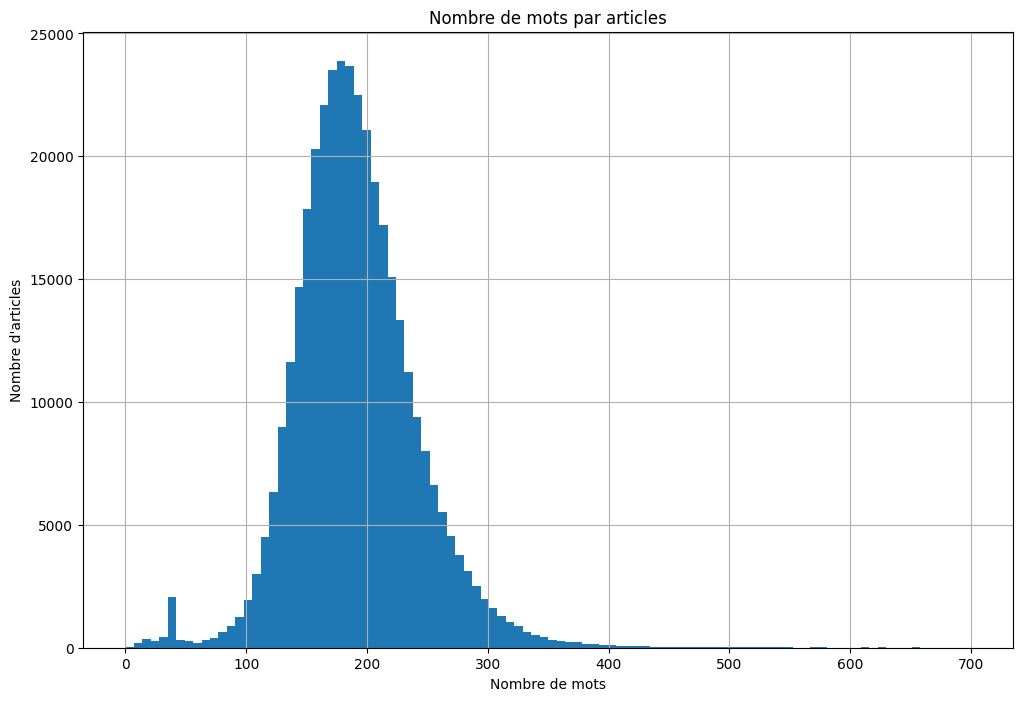

In [42]:
plt.figure(figsize=(12,8))
plt.title("Nombre de mots par articles")
df_art_meta.words_count.hist(bins=100,range=(0,700))
plt.xlabel("Nombre de mots")
plt.ylabel("Nombre d'articles")
plt.show()

1. **Distribution centrale** : La majorité des articles contient entre 150 et 300 mots, avec un pic notable autour de 200 mots. Cela suggère que la plupart des articles sont relativement courts.

2. **Anomalie à gauche** : Un pic secondaire autour de 50 mots pourrait indiquer la présence d'articles très courts, potentiellement des articles d'annonce ou des résumés.

Cette distribution en forme de cloche, avec une légère asymétrie vers les valeurs plus élevées.

### 4. t-SNE - ``Articles_embeddings.pickle``

In [43]:
# Ouvrir le fichiers pickle
with open(data_path / 'articles_embeddings.pickle', 'rb') as f:
    data = pickle.load(f)

df_emb = pd.DataFrame(data)

In [60]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='pca', random_state=6)
X_tsne = tsne.fit_transform(df_emb[:15000])

df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
print(df_tsne.shape)

c:\Users\Zacca\miniconda3\envs\projet10\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(15000, 2)
CPU times: total: 15.2 s
Wall time: 2min 23s


C:\Users\Zacca\AppData\Local\Temp\ipykernel_7140\3169592633.py:5: UserWarning: The palette list has more values (100) than needed (8), which may not be intended.
  sns.scatterplot(


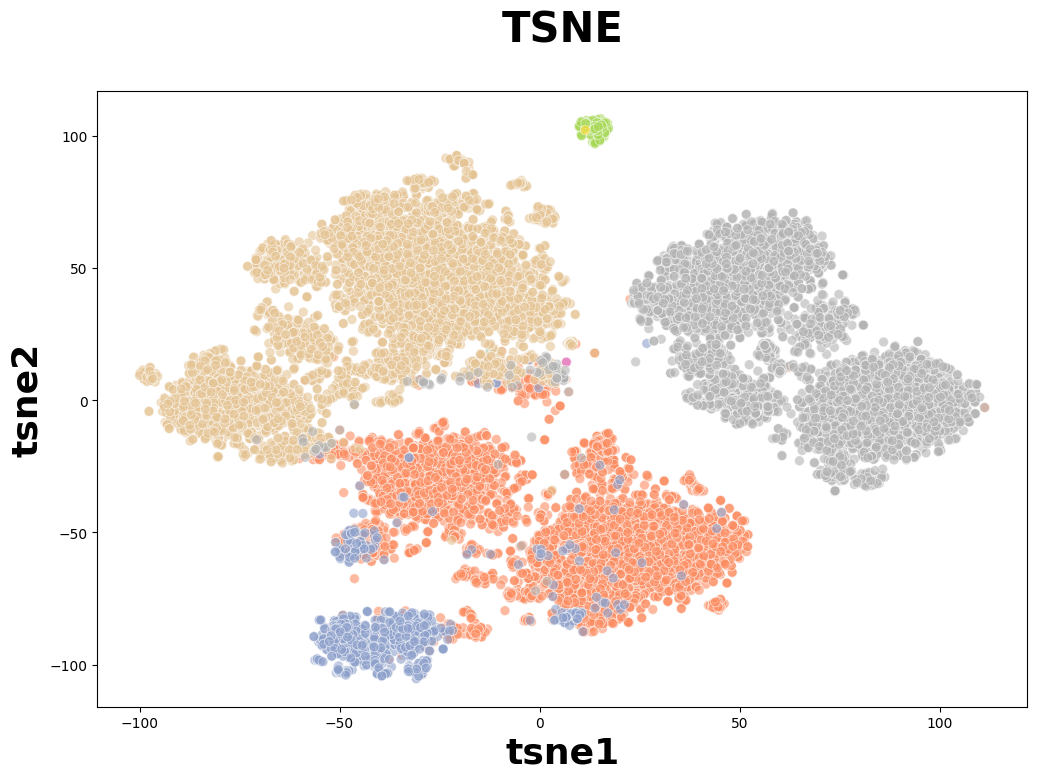

In [61]:
plt.figure(figsize=(12,8))

df_tsne["category_id"] = df_art_meta["category_id"].head(50000)

sns.scatterplot(
    x="tsne1", y="tsne2",hue="category_id",
    palette=sns.color_palette('Set2',df_art_meta["category_id"].head(50000).nunique()),
    data=df_tsne,s=50, alpha=0.6, legend=None)

plt.title('TSNE', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold') 

plt.show()